# NEURAL NETWORK DESIGN AND IMPLEMENATATION
### (Application: Multiclass Classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from scipy.io import loadmat
data = loadmat('ex4data1.mat')
X = data['X']
y = data['y']

data2 = loadmat('ex4weights.mat')

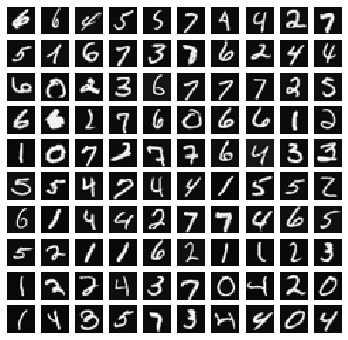

In [3]:
arr = np.random.randint(10,4000,(10,10))

fig, ax = plt.subplots(10,10, figsize=(6,6))
for i in range(10):
    for j in range(10):
        X_vis = X[arr[i,j]].reshape(20,20)
        X_vis = np.rot90(X_vis, k=1)
        ax[i,j].imshow(X_vis.reshape(20,20), cmap = 'gray', origin='lower')
        ax[i,j].axis('off')
plt.show()

# 1. Functions for Neural Network
<blockquote>
The regular logistic functions for sigmoid and regression function, h(x) are as usual. <br><br>
Following are the updates to incorporate:<br><br>
<b>1. The output training results (y) have to be converted into a binary encoder of class size vector.<br><br>
2. Forward Propogation is used to calculate regressive functions, or in this case also called layer coefficients (h_ or A). These results are then used to calculate the cost function (J).<br><br>
3. Backward Propgation is used to formulate the gradient vector using customised Neural network formulae.</b><br><br>
Both these concepts are shown in the image below:
 </blockquote>   

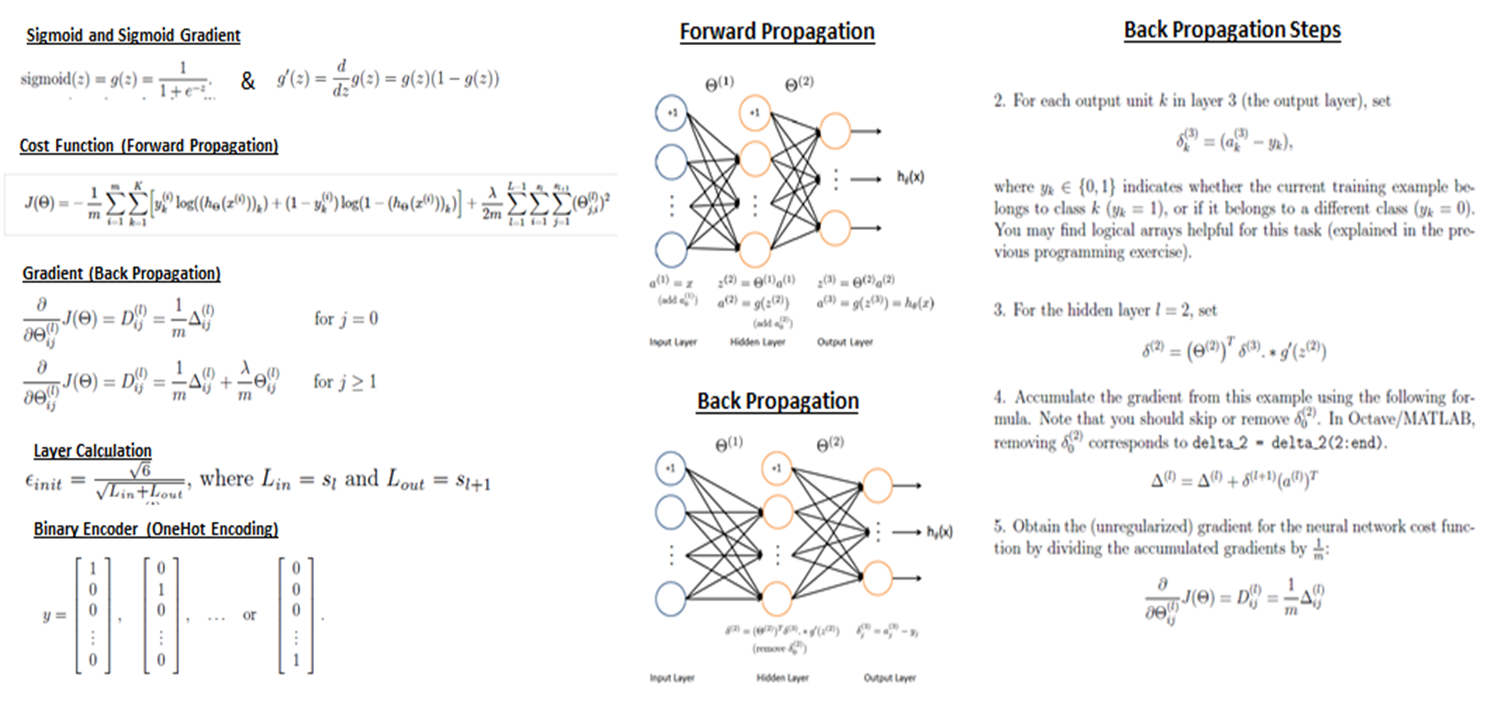

In [4]:
from IPython.display import Image
Image(filename = r"D:\Python_Work\Machine_Learning\Coursera\Exercises\Neural_Network\Full_Method\Picture3.png")

In [5]:
###########################################################
####### Sigmoid related Regression Functions ##############
###########################################################

def train_h(theta, X):
    z = X.dot(theta)
    h = 1/(1+np.exp(-z))
    return h

def sig_grad_fun(z):
    gz = 1/(1+np.exp(-z))
    sig_grad = gz*(1-gz)
    return sig_grad


###########################################################
####### Functions for parameter (theta) manipulation ######
###########################################################

import math as math

def rand_ini(L_in, L_out):
    epsi = math.sqrt(6) / math.sqrt((L_in + L_out))
    W = np.random.rand(L_out, L_in+1) * (2 * epsi) - epsi
    return W

def unroll(nn_params, inp, hid, out):
    theta1 = nn_params[:((inp+1) * hid)].reshape(hid,inp+1)
    theta2 = nn_params[((inp+1)* hid):].reshape(out,hid+1)
    return theta1, theta2

#################################################################
#### Cost and Gradient Functions modified for Neural Network ####
#################################################################

def nn_CostGradient(nn_params, inp, hid, out, X, y_onehot, lmb):
    
    theta_L1, theta_L2 = unroll(nn_params, inp, hid, out)
    
    m = len(y_onehot)
    
    h_L2 = train_h(theta_L1.T, X)
    h_L2 = np.append(np.ones([m,1]), h_L2, axis=1)
    h_L3 = train_h(theta_L2.T, h_L2)
    
    error = h_L3 - y_onehot
    lg_1 = np.log(h_L3)
    lg_2 = np.log(1-h_L3)
    
    Normal_J = (-1/m) * (sum(sum(y_onehot*(lg_1) + (1-y_onehot)*(lg_2))))
    reg_term = (lmb/(2*m)) * (np.sum(theta_L1[:,1:]**2) + np.sum(theta_L2[:,1:]**2))
    
    Reg_J = Normal_J + reg_term
                                
# Gradient Function (Back Propagation)

    delta_L3 = h_L3 - y_onehot
    delta_L2 = (delta_L3.dot(theta_L2)) * (sig_grad_fun(h_L2))
    delta_L2 = delta_L2[:,1:]
    
    grad_T1 = (1/m) * (delta_L2.T.dot(X))
    grad_T2 = (1/m) * (delta_L3.T.dot(h_L2))
    
    # Regularisation
    zeros_col_T1 = np.zeros([theta_L1.shape[0],1])
    zeros_col_T2 = np.zeros([theta_L2.shape[0],1])
    
    reg_term_T1 = (lmb/m) * (np.append(zeros_col_T1, theta_L1[:, 1:],axis=1))
    reg_term_T2 = (lmb/m) * (np.append(zeros_col_T2, theta_L2[:, 1:],axis=1)) 
    
    grad_T1 = grad_T1 + reg_term_T1
    grad_T2 = grad_T2 + reg_term_T2
    
    grad_roll = np.append(grad_T1.flatten(), grad_T2.flatten())
    
    return Reg_J, grad_roll
        

# 2. Setting up data and performing a dummy run for  given parameters $\theta$
<blockquote>
The layer parameters $\theta_1$ and $\theta_2$ are already provided just like in exercise 3.<br>
This to verify and validate that the custom regression functions for forward and backpropogation are able to give produce the reference results. <br>
Once verified, this will be starting block to build the Neural Network from scratch.

In [6]:
###########################################################
################### Setting up the Data ###################
###########################################################

X = data['X']
m,n = X.shape
X = np.append(np.ones([m,1]),X,axis = 1)
m,n = X.shape

y = data['y']
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)
print('The size of Layer-3 (Output, y) matrix after logical one-hot encoding is',y_onehot.shape)

theta_L1 = data2['Theta1']
theta_L2 = data2['Theta2']

theta_roll = np.append(theta_L1.flatten(), theta_L2.flatten())

inp = 400 # --> Input features (Columns of the X-training sets) -- L1
hid = 25  # --> Number of units in Hidden Layer -- L2
out = 10  # --> Number of output classes (y) -- L3

##########################################################################################################
## Cost function calculation check - Regularised  ##

lmb = 3
Jreg, G_roll = nn_CostGradient(theta_roll, inp, hid, out, X, y_onehot, lmb)
G1, G2 = unroll(G_roll, inp, hid, out)

print('Theta-1 and Theta-2 are matrices of shape',theta_L1.shape, theta_L2.shape)
print('The regularised cost with lambda = 3 is', Jreg.round(6))
print('\nSize of Layer-2 (Hidden) parameter (theta-1) matrix is',G1.shape)
print('Size of Layer-3 (Output) parameter (theta-2) matrix is',G2.shape)

The size of Layer-3 (Output, y) matrix after logical one-hot encoding is (5000, 10)
Theta-1 and Theta-2 are matrices of shape (25, 401) (10, 26)
The regularised cost with lambda = 3 is 0.576051

Size of Layer-2 (Hidden) parameter (theta-1) matrix is (25, 401)
Size of Layer-3 (Output) parameter (theta-2) matrix is (10, 26)


# 3. Building and training a Neural Network using randomised parameters 
<blockquote><b>The motive will be to derive and optimise the layer parameters ($\theta$) from the following steps: </b><br>
<b>Step 1:</b> <br>Add the bias vector to input data (X). Use scikit onehot encoder to convert the training data into class size binary encoders. <br><br>
<b>Step 2:</b> <br>Randomise the $\theta_1$ and $\theta_2$ using layer size data, randomisation and roll functions.<br><br>
<b>Step 3:</b> <br>Parameter Optimisation to be checked using Gradient Descent and Scikit Techniques.

### Scikit Optimisation Algorithms

In [7]:
import scipy.optimize as opt
from scipy.optimize import minimize

In [8]:
X = data['X']
m,n = X.shape
X = np.append(np.ones([m,1]),X,axis = 1)
m,n = X.shape

y = data['y']
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)

inp = 400 
hid = 25  
out = 10  

theta_L1 = rand_ini(inp, hid)
theta_L2 = rand_ini(hid,out)
theta_roll = np.append(theta_L1.flatten(), theta_L2.flatten())

lmb = 3
opt_parm = opt.fmin_tnc(func = nn_CostGradient, x0 = theta_roll,
                        args=(inp, hid, out, X, y_onehot, lmb), maxfun=250)[0].reshape(-1,1)
#opt_parm = opt.minimize(fun = nn_CostGradient, x0 = theta_roll,  method = 'TNC', jac=True,
#                        args=(inp, hid, out, X, y_onehot, lmb), options = {'maxiter':200})

In [9]:
opt_theta_L1, opt_theta_L2 = unroll(opt_parm, inp, hid, out)
print('The size of optimised parameters of Layer-2 is', opt_theta_L1.shape)
print('The size of optimised parameters of Layer-3 is', opt_theta_L2.shape)

The size of optimised parameters of Layer-2 is (25, 401)
The size of optimised parameters of Layer-3 is (10, 26)


### Gradient Descent Algorithm

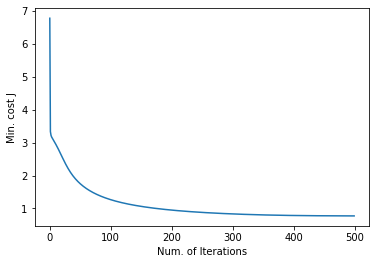

In [10]:
def Grad_Descent(nn_params, alpha, inp, hid, out, X, y_onehot, lmb):
    J_history =[]
    num_iter = 500
    theta1, theta2 = unroll(nn_params, inp, hid, out)
    
    for i in range(num_iter):
        nn_params = np.append(theta1.flatten(), theta2.flatten())
        Cost, G_roll = nn_CostGradient(nn_params, inp, hid, out, X, y_onehot, lmb)
        grad_1, grad_2 = unroll(G_roll, inp, hid, out)
        theta1, theta2 = unroll(nn_params, inp, hid, out)
        theta1 = theta1 - (alpha * grad_1)
        theta2 = theta2 - (alpha * grad_2)
        J_history.append(Cost)
        
    return theta1, theta2, J_history

##############################################################################################

X = data['X']
m,n = X.shape
X = np.append(np.ones([m,1]),X,axis = 1)
m,n = X.shape

y = data['y']
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)

inp = 400 
hid = 25  
out = 10  

theta_L1 = rand_ini(inp, hid)
theta_L2 = rand_ini(hid,out)
theta_roll = np.append(theta_L1.flatten(), theta_L2.flatten())

##############################################################################################

alpha_GD = 0.8
lmb_GD = 0.1
GD_theta_L1, GD_theta_L2, J_descent = Grad_Descent(theta_roll, alpha_GD, inp, hid, out, X, y_onehot, lmb_GD)

    
fig = plt.figure()
Cost_conv = fig.add_subplot(111)
Cost_conv.set_xlabel('Num. of Iterations')
Cost_conv.set_ylabel('Min. cost J')

Cost_conv.plot(J_descent)

plt.show()
        

# 4. Accuracy and Prediction using optimised parameters

In [11]:
def predict(theta_L1, theta_L2, X, y):
    m = len(y_onehot)
    
    h_L2 = train_h(theta_L1.T, X)
    h_L2 = np.append(np.ones([m,1]), h_L2, axis=1)
    h_L3 = train_h(theta_L2.T, h_L2)
    
    corrects = 0

    for i in range(len(h_L3)):
        lst = list(h_L3[i])
        lst.insert(0, -1)
        max_index = lst.index(max(lst))
        if max_index == y[i]:
            corrects = corrects + 1
        
    return corrects
        
prediction = predict(opt_theta_L1, opt_theta_L2, X, y)
print('For Scikit Algorithm, lambda is', lmb)
print('The Accuracy from Scikit Algorithm is {0} %'.format(100 * prediction / m)) 

prediction = predict(GD_theta_L1, GD_theta_L2, X, y)
print('\nFor Gradient Descent, alpha and lambda is',(alpha_GD, lmb_GD))
print('The Accuracy from Gradient Descent Algorithm is {0} %'.format(100 * prediction / m))
print(f'The cost function associated with the last iteration is {round(J_descent[-1],4)}.')

For Scikit Algorithm, lambda is 3
The Accuracy from Scikit Algorithm is 59.06 %

For Gradient Descent, alpha and lambda is (0.8, 0.1)
The Accuracy from Gradient Descent Algorithm is 88.96 %
The cost function associated with the last iteration is 0.7739.
